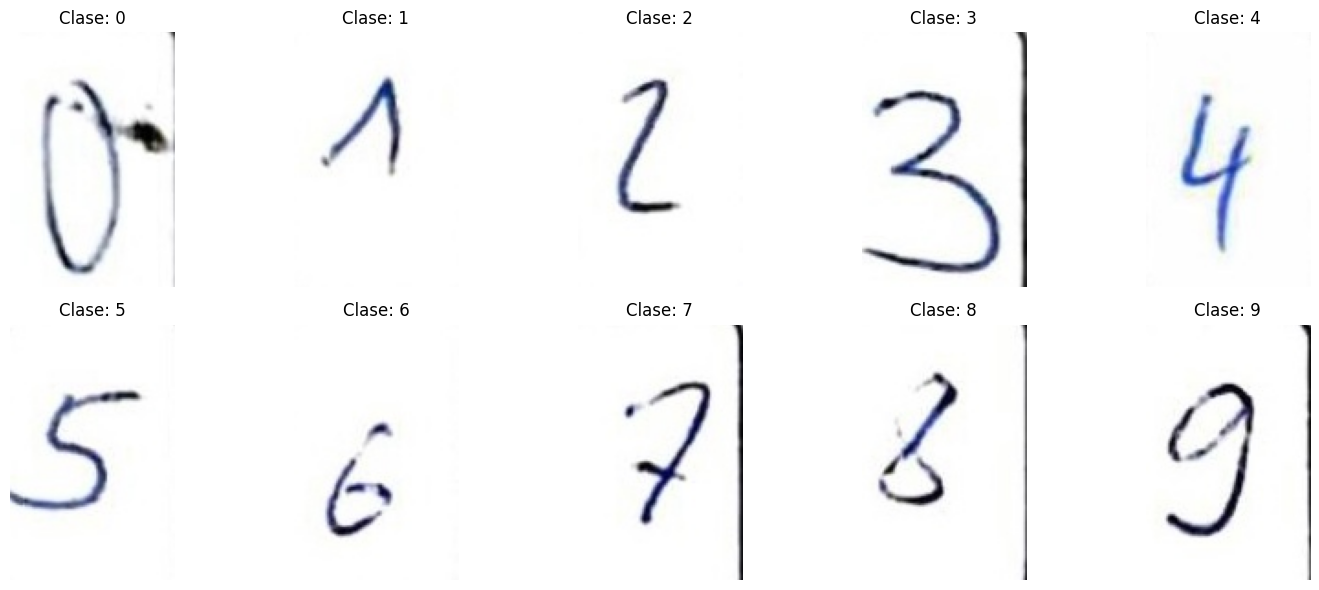

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

sample_path = 'archive'

clases = sorted(os.listdir(sample_path))

# Mostrar 10 imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, clase in zip(axes.flat, clases[:10]):
    clase_path = os.path.join(sample_path, clase)
    imagenes = os.listdir(clase_path)

    if imagenes:
        img_path = os.path.join(clase_path, imagenes[0])  # Primera imagen
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB
        ax.imshow(img)
        ax.set_title(f"Clase: {clase}")
        ax.axis('off')

plt.tight_layout()
plt.show()


In [17]:
def cargar_datos(ruta_base, tamaño=(28, 28), limite_por_clase=None):
    x = []
    y = []
    
    for etiqueta in sorted(os.listdir(ruta_base)):
        ruta_clase = os.path.join(ruta_base, etiqueta)
        if not os.path.isdir(ruta_clase):
            continue
        
        archivos = os.listdir(ruta_clase)
        if limite_por_clase:
            archivos = archivos[:limite_por_clase]
        
        for archivo in archivos:
            img_path = os.path.join(ruta_clase, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, tamaño)
            img = img.flatten()
            x.append(img)
            y.append(int(etiqueta))
    
    return np.array(x), np.array(y)

# Cargar 100 imágenes por clase (100x10 = 1000 imágenes)
x, y = cargar_datos('archive', limite_por_clase=100)
print("Shape x:", x.shape)
print("Shape y:", y.shape)


Shape x: (1000, 784)
Shape y: (1000,)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.71      0.75      0.73        20
           2       0.70      0.70      0.70        20
           3       0.47      0.45      0.46        20
           4       0.55      0.55      0.55        20
           5       0.57      0.65      0.60        20
           6       0.77      0.85      0.81        20
           7       0.58      0.75      0.65        20
           8       0.38      0.25      0.30        20
           9       0.76      0.65      0.70        20

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200



In [20]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [21]:
data_path = 'archive'

x = []
y = []

# Recorrer cada carpeta por dígito
for label in sorted(os.listdir(data_path)):
    folder_path = os.path.join(data_path, label)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(folder_path, image_file)
                try:
                    # Convertir imagen a escala de grises y redimensionar
                    image = Image.open(image_path).convert('L')
                    image = image.resize((28, 28))
                    image_array = np.array(image).flatten()  # Flatten para ML
                    x.append(image_array)
                    y.append(int(label))
                except Exception as e:
                    print(f"Error al procesar {image_file}: {e}")

x = np.array(x)
y = np.array(y)

print(f"Total de imágenes cargadas: {len(x)}")


Total de imágenes cargadas: 21555


In [23]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predecir en test
y_pred = model.predict(X_test_scaled)

# Evaluar rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

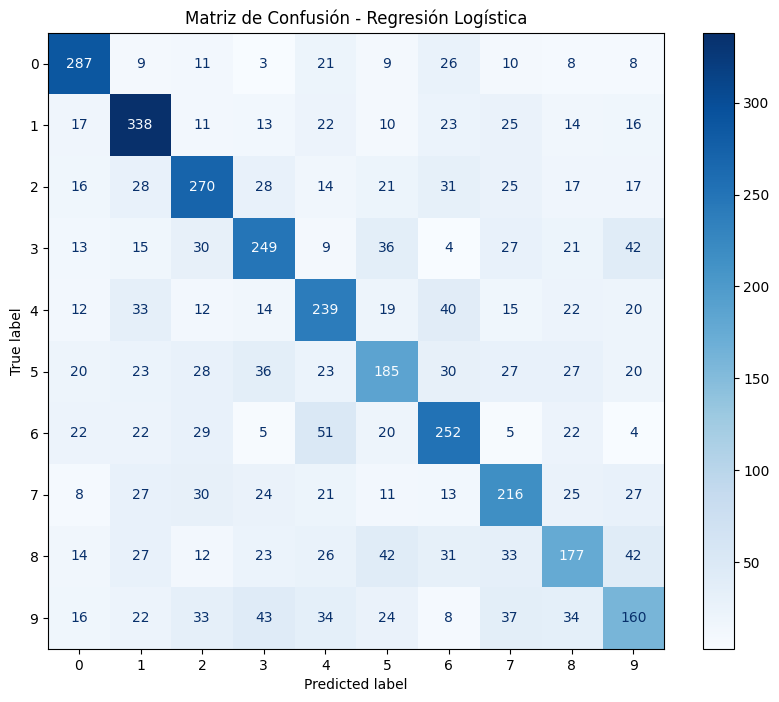

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("Accuracy KNN:", accuracy_score(y_test, y_pred_knn))
print("\nMatriz de Confusión - KNN:\n", confusion_matrix(y_test, y_pred_knn))
print("\nReporte de Clasificación - KNN:\n", classification_report(y_test, y_pred_knn))


Matriz de confusión

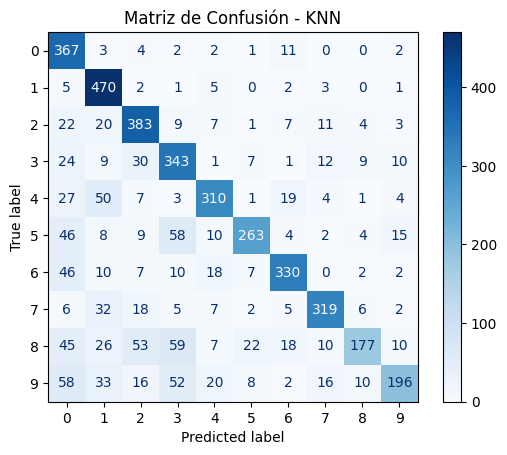

In [28]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN")
plt.show()